<a href="https://colab.research.google.com/github/Yash-Jumde/Colab-Notebooks/blob/main/Predict_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset_raw = pd.read_csv(URL, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
data = dataset_raw.copy()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
data.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Origin'] = data['Origin'].map({1: 'US', 2: 'Europe', 3: 'Japan'})

In [ ]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,US
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,US
396,28.0,4,120.0,79.0,2625.0,18.6,82,US


In [ ]:
data = pd.get_dummies(data, columns=['Origin'])
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_US
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
train = data.sample(frac=0.8, random_state=10)
test = data.drop(train.index)

In [ ]:
train

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_US
243,21.5,3,80.0,110.0,2720.0,13.5,77,0,1,0
371,29.0,4,135.0,84.0,2525.0,16.0,82,0,0,1
300,23.9,8,260.0,90.0,3420.0,22.2,79,0,0,1
345,35.1,4,81.0,60.0,1760.0,16.1,81,0,1,0
265,17.5,8,318.0,140.0,4080.0,13.7,78,0,0,1
...,...,...,...,...,...,...,...,...,...,...
234,24.5,4,151.0,88.0,2740.0,16.0,77,0,0,1
80,22.0,4,122.0,86.0,2395.0,16.0,72,0,0,1
187,17.5,8,305.0,140.0,4215.0,13.0,76,0,0,1
376,37.0,4,91.0,68.0,2025.0,18.2,82,0,1,0


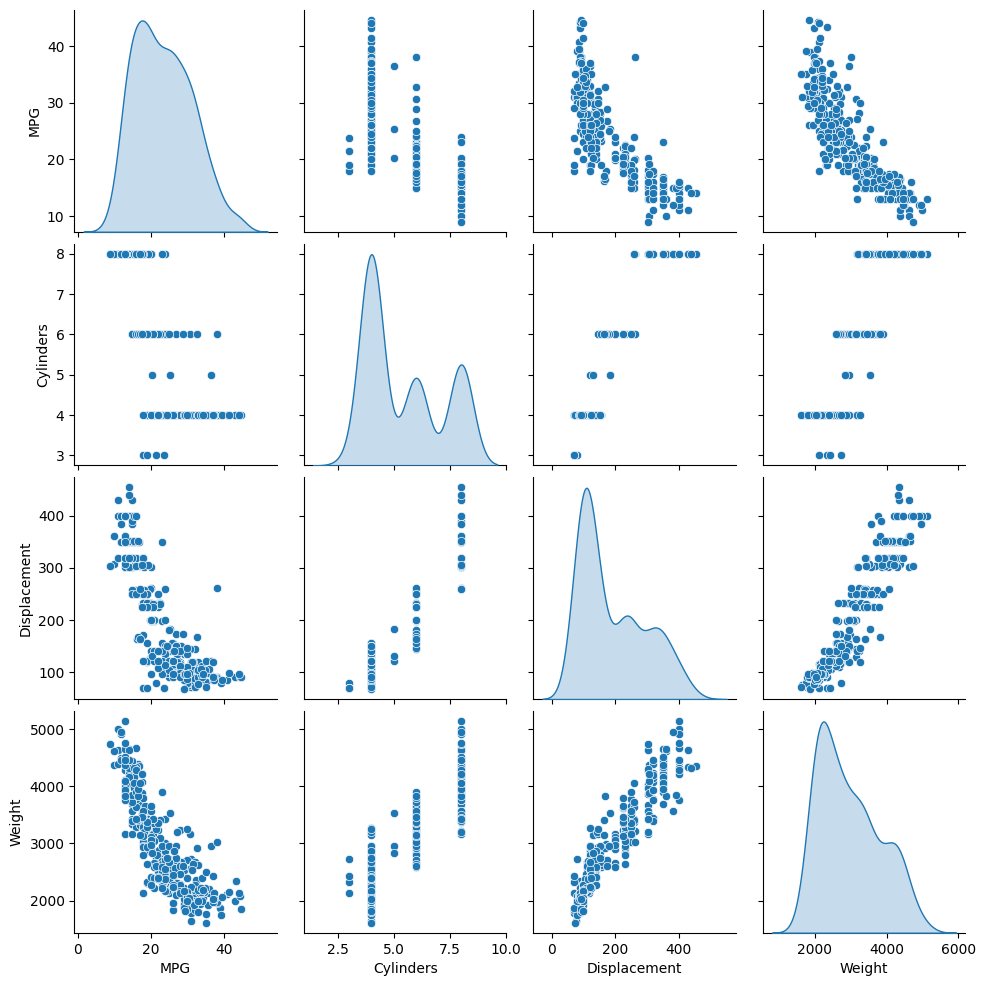

In [ ]:
# Inspecting the dataset

sns.pairplot(train[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [ ]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_US
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.506688,5.417197,191.463376,103.191083,2967.388535,15.692675,75.958599,0.187898,0.191083,0.621019
std,7.766224,1.688475,102.948230,37.622496,845.042110,2.774814,3.627399,0.391254,0.393782,0.485908
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,101.750000,75.000000,2220.750000,13.925000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,144.500000,90.000000,2767.000000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,6.000000,259.500000,120.000000,3554.750000,17.275000,79.000000,0.000000,0.000000,1.000000
max,44.600000,8.000000,454.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.506688,7.766224,9.0,17.500,23.0,29.000,44.6
Cylinders,314.0,5.417197,1.688475,3.0,4.000,4.0,6.000,8.0
Displacement,314.0,191.463376,102.948230,68.0,101.750,144.5,259.500,454.0
Horsepower,314.0,103.191083,37.622496,46.0,75.000,90.0,120.000,230.0
Weight,314.0,2967.388535,845.042110,1613.0,2220.750,2767.0,3554.750,5140.0
Acceleration,314.0,15.692675,2.774814,8.5,13.925,15.5,17.275,24.8
Model Year,314.0,75.958599,3.627399,70.0,73.000,76.0,79.000,82.0
Origin_Europe,314.0,0.187898,0.391254,0.0,0.000,0.0,0.000,1.0
Origin_Japan,314.0,0.191083,0.393782,0.0,0.000,0.0,0.000,1.0
Origin_US,314.0,0.621019,0.485908,0.0,0.000,1.0,1.000,1.0


In [ ]:
# Seperate the dependent variable.
X_train = train.copy()
X_test = test.copy()

y_train = train.pop('MPG')
y_test = test.pop('MPG')

In [ ]:
X_train

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_US
243,21.5,3,80.0,110.0,2720.0,13.5,77,0,1,0
371,29.0,4,135.0,84.0,2525.0,16.0,82,0,0,1
300,23.9,8,260.0,90.0,3420.0,22.2,79,0,0,1
345,35.1,4,81.0,60.0,1760.0,16.1,81,0,1,0
265,17.5,8,318.0,140.0,4080.0,13.7,78,0,0,1
...,...,...,...,...,...,...,...,...,...,...
234,24.5,4,151.0,88.0,2740.0,16.0,77,0,0,1
80,22.0,4,122.0,86.0,2395.0,16.0,72,0,0,1
187,17.5,8,305.0,140.0,4215.0,13.0,76,0,0,1
376,37.0,4,91.0,68.0,2025.0,18.2,82,0,1,0


In [ ]:
y_train

243    21.5
371    29.0
300    23.9
345    35.1
265    17.5
       ... 
234    24.5
80     22.0
187    17.5
376    37.0
222    17.0
Name: MPG, Length: 314, dtype: float64

In [ ]:
# Normalization

normalize = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalize.adapt(np.array(X_train))

In [ ]:
print(normalize.mean.numpy())

[[  23.507    5.417  191.463  103.191 2967.389   15.693   75.959    0.188
     0.191    0.621]]


In [ ]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalize(first).numpy())

First example: [[  21.5    3.    80.   110.  2720.    13.5   77.     0.     1.     0. ]]

Normalized: [[-0.26 -1.43 -1.08  0.18 -0.29 -0.79  0.29 -0.48  2.06 -1.28]]


In [ ]:
# Predicting 'MPG' from 'Horsepower'

hp = np.array(X_train['Horsepower'])

hp_normalize = layers.Normalization(input_shape=[1,], axis=None)
hp_normalize.adapt(hp)

In [ ]:
hp_model = tf.keras.Sequential([
    hp_normalize,
    layers.Dense(1)
])

hp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
hp_model.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [ ]:
%%time

history = hp_model.fit(
    X_train['Horsepower'],
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.09 s, sys: 199 ms, total: 5.29 s
Wall time: 5.67 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,22.847031,24.063868,0
1,22.023771,23.270655,1
2,21.223175,22.474676,2
3,20.423582,21.677200,3
4,19.620493,20.877651,4
...,...,...,...
95,3.741336,4.261624,95
96,3.741912,4.262940,96
97,3.742414,4.260320,97
98,3.740813,4.267936,98


In [ ]:
# plot the progress

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

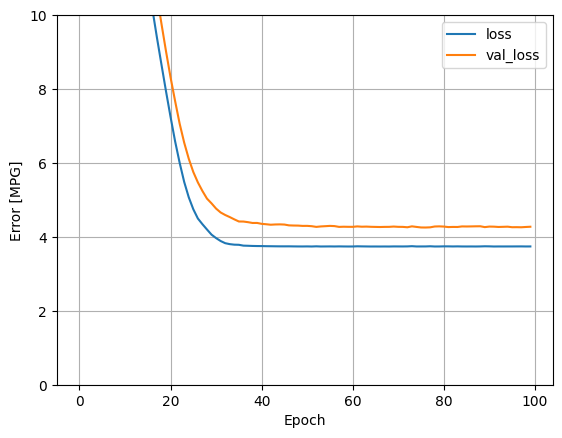

In [ ]:
plot_loss(history)

In [ ]:
# Collect our test sets
test_results = {}

test_results['horsepower_model'] = hp_model.evaluate(
    X_test['Horsepower'], y_test, verbose=0
)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = hp_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [ ]:
def plot_hp(x, y):
  plt.scatter(X_train['Horsepower'], y_train, label='Data')
  plt.plot(x, y, color='r', label='Predictions')
  plt.xlabel('HP')
  plt.ylabel('MPG')
  plt.legend()

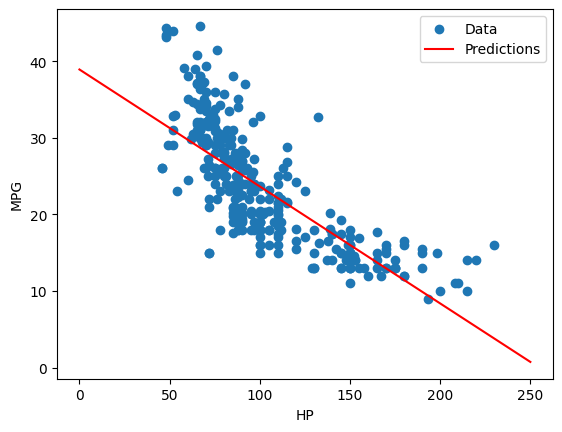

In [ ]:
plot_hp(x, y)

In [ ]:
# Linear Regression with Multiple inputs

model_2 = tf.keras.Sequential([
    normalize,
    layers.Dense(1)
])

In [ ]:
model_2.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.699],
       [ 0.684],
       [-0.084],
       [ 0.428],
       [-0.035],
       [ 0.561],
       [-0.251],
       [-0.308],
       [ 0.441],
       [ 0.242]], dtype=float32)>

In [ ]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mae'
)

In [ ]:
%%time

history = model_2.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 7.18 s, sys: 182 ms, total: 7.36 s
Wall time: 10.8 s


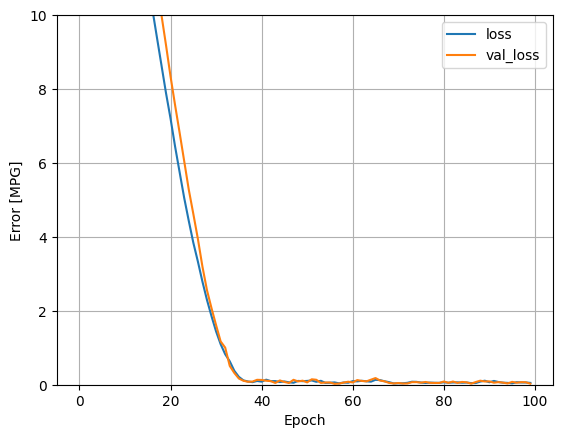

In [ ]:
plot_loss(history)

In [ ]:
test_results['model_2'] = model_2.evaluate(
    X_test, y_test
)

3/3 [==============================] - 0s 6ms/step - loss: 0.0198


In [ ]:
# Regression with a DNN

# Function to create a model
def build_compile_model(normalizer):
  model = tf.keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(0.001))

  return model

In [ ]:
# Trying to make the first model using NN

nn_horsepower_model = build_compile_model(normalize)

In [ ]:
nn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4950 (19.34 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 21 (88.00 Byte)
_________________________________________________________________


In [ ]:
%%time

history = nn_horsepower_model.fit(
    X_train['Horsepower'],
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 8.34 s, sys: 212 ms, total: 8.56 s
Wall time: 11.7 s


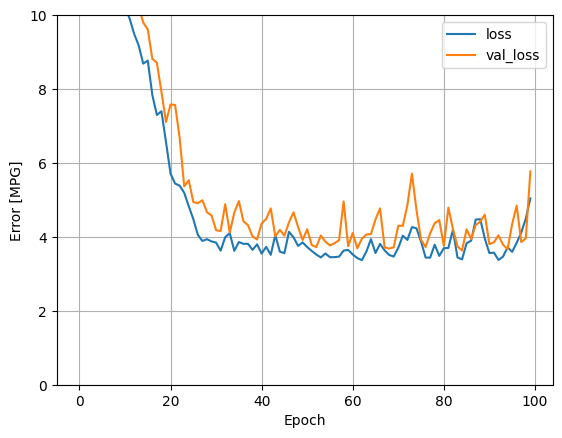

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
x_1 = tf.reshape(x, (-1, 1))

In [ ]:
y = nn_horsepower_model.predict(x_1)


8/8 [==============================] - 0s 2ms/step


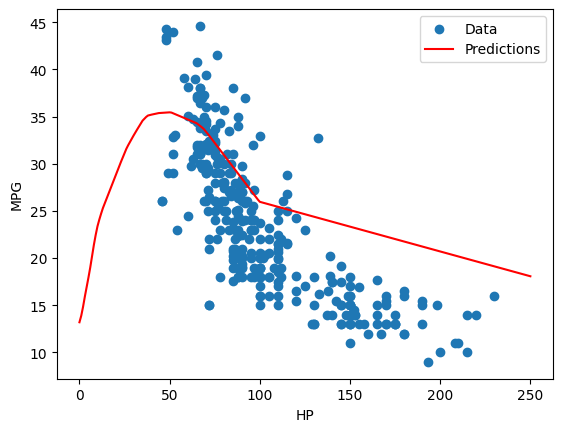

In [ ]:
plot_hp(x, y)

In [ ]:
test_results['nn_hp_model'] = nn_horsepower_model.evaluate(
    X_test['Horsepower'], y_test,
    verbose=0
)

In [ ]:
# Now using multiple inputs.

nn_model_2 = build_compile_model(normalize)
nn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 10)                21        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4950 (19.34 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 21 (88.00 Byte)
_________________________________________________________________


In [ ]:
%%time

history = nn_model_2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 8.07 s, sys: 219 ms, total: 8.29 s
Wall time: 12.7 s


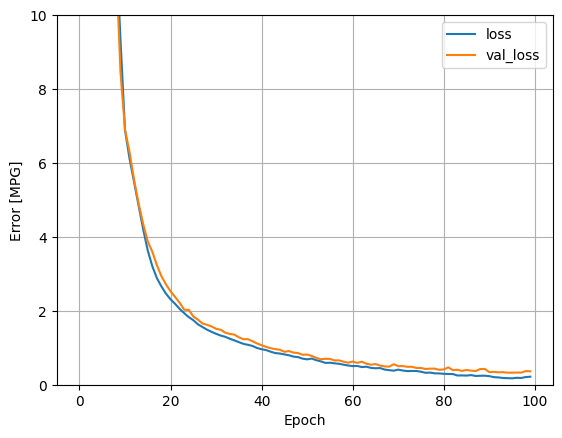

In [ ]:
plot_loss(history)

In [ ]:
test_results['nn_model_2'] = nn_model_2.evaluate(
    X_test,
    y_test,
    verbose=0
)

In [ ]:
pd.DataFrame(test_results, index=['Mean Absolute Error']).T

,Mean Absolute Error
horsepower_model,3.730917
model_2,0.019842
nn_hp_model,5.528061
nn_model_2,0.287822


In [ ]:
y_pred = nn_model_2.predict(X_test).flatten()

3/3 [==============================] - 0s 6ms/step


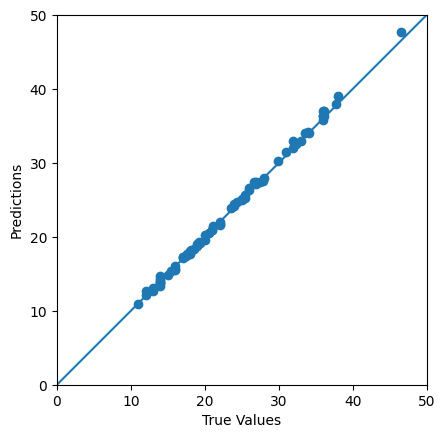

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

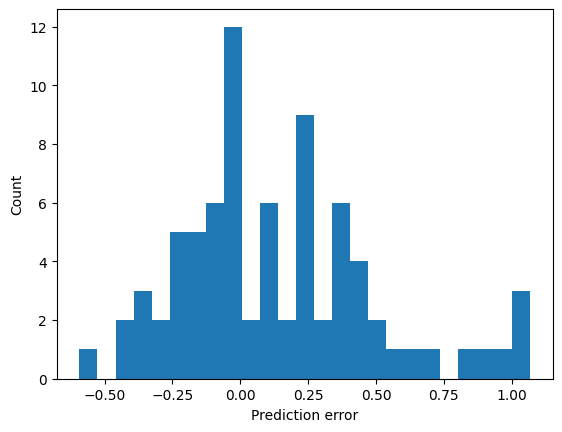

In [ ]:
# Error distribution:

err = y_pred - y_test
plt.hist(err, bins=25)
plt.xlabel('Prediction error')
_ = plt.ylabel('Count')

In [ ]:
nn_model_2.save('nn_model')